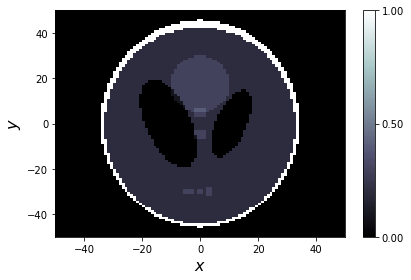

<Figure size 432x288 with 0 Axes>

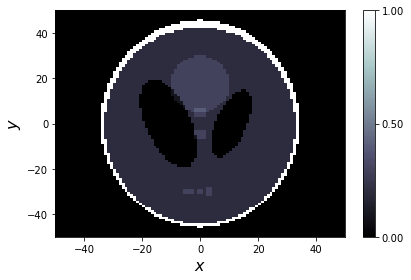

In [1]:
import odl


phantom_space = odl.uniform_discr([-50., -50.], [ 50.,  50.], (100, 100))
phantom = odl.phantom.shepp_logan(phantom_space, modified=True)
phantom.show()

In [2]:
fft = odl.trafos.DiscreteFourierTransform(phantom_space)

In [3]:
fft_phantom = fft(phantom)

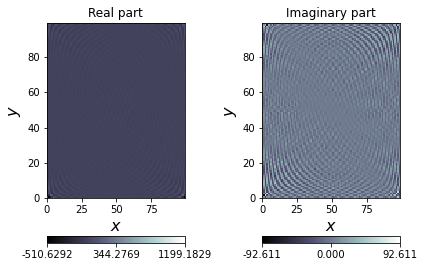

<Figure size 432x288 with 0 Axes>

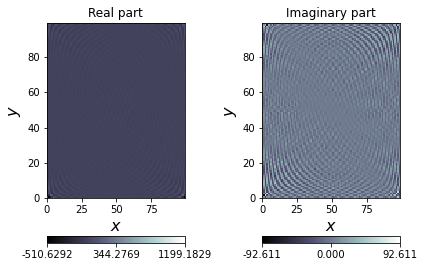

In [4]:
fft_phantom.show()

In [43]:
ifft = odl.trafos.DiscreteFourierTransformInverse(fft_phantom.space)

In [45]:
phantom_back = ifft(fft_phantom)
ifft.domain, ifft.range

(uniform_discr([ 0.,  0.], [ 99.,  99.], (100, 100), nodes_on_bdry=True, dtype=complex),
 uniform_discr([ 0.,  0.], [ 99.,  99.], (100, 100), nodes_on_bdry=True, dtype=complex))

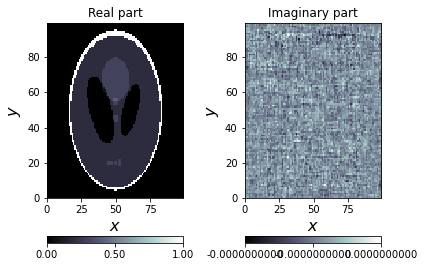

<Figure size 432x288 with 0 Axes>

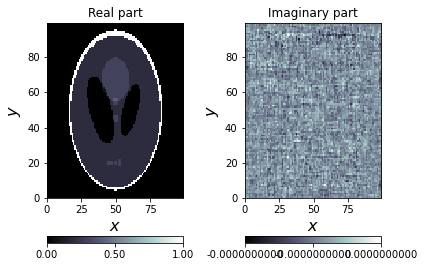

In [7]:
phantom_back.show()

In [8]:
fft

DiscreteFourierTransform: uniform_discr([-50., -50.], [ 50.,  50.], (100, 100)) -> uniform_discr([ 0.,  0.], [ 99.,  99.], (100, 100), nodes_on_bdry=True, dtype=complex)

In [9]:
keep_fraction = 0.3

fft_phantom2 = fft_phantom.copy()

In [10]:
r, c = fft_phantom2.shape

In [11]:
r, c

(100, 100)

In [12]:
fft_phantom2[int(r*keep_fraction):int(r*(1-keep_fraction))]=0

In [13]:
fft_phantom2[:,int(c*keep_fraction):int(c*(1-keep_fraction))]=0

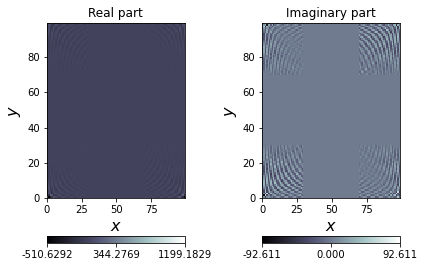

<Figure size 432x288 with 0 Axes>

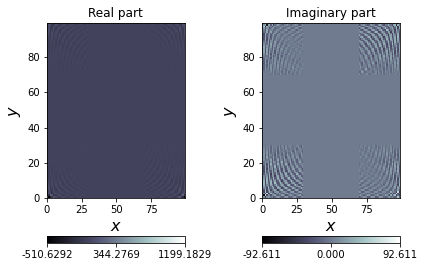

In [14]:
fft_phantom2.show()

In [15]:
phantom_compressed_recon = ifft(fft_phantom2)

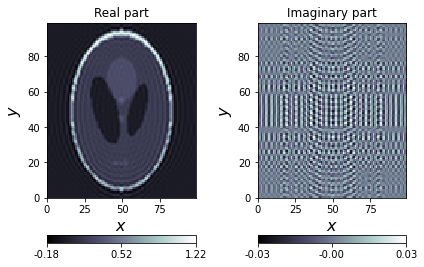

<Figure size 432x288 with 0 Axes>

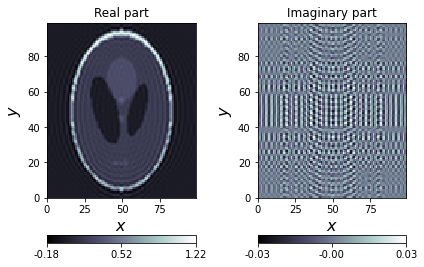

In [16]:
phantom_compressed_recon.show()

In [29]:
import numpy as np
ones = np.ones(fft_phantom2.space.shape)
ones[int(r*keep_fraction):int(r*(1-keep_fraction))]=0
ones[:,int(c*keep_fraction):int(c*(1-keep_fraction))]=0
keepers = fft_phantom2.space.element(ones)

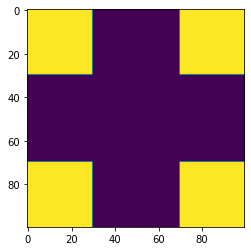

In [30]:
import matplotlib.pyplot as plt
plt.imshow(keepers.real)

In [27]:
keepers.shape

(100, 100)

In [36]:
#weights = np.ones(fft.range.shape)
#weights[2,:,:,:] = weights[2,:,:]*lamda_2
#weight_vec = gradient.range.element(weights)
weighted_ifft = odl.OperatorRightVectorMult(ifft, keepers)

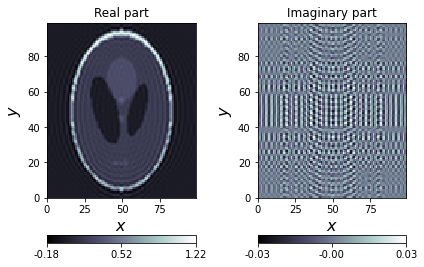

<Figure size 432x288 with 0 Axes>

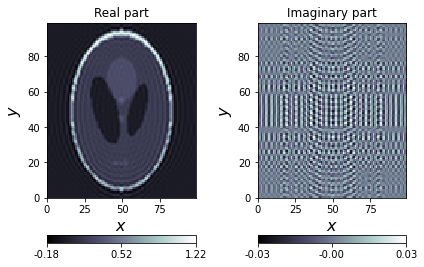

In [37]:
weighted_fft(fft_phantom).show()

In [40]:
ifft.range.shape

(100, 100)

In [3]:

t_n = 1
N = 100000
T = t_n / N
f_s = 1/T

xa = np.linspace(0, t_n, num=N)
xb = np.linspace(0, t_n/4, num=N/4)

frequencies = [4, 30, 60, 90]
y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)

composite_signal1 = y1a + y2a + y3a + y4a
composite_signal2 = np.concatenate([y1b, y2b, y3b, y4b])

f_values1, fft_values1 = get_fft_values(composite_signal1, T, N, f_s)
f_values2, fft_values2 = get_fft_values(composite_signal2, T, N, f_s)

fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axarr[0,0].plot(xa, composite_signal1)
axarr[1,0].plot(xa, composite_signal2)
axarr[0,1].plot(f_values1, fft_values1)
axarr[1,1].plot(f_values2, fft_values2)
(...)
plt.tight_layout()
plt.show()
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
t_n = 1
N = 100000
T = t_n / N
f_s = 1/T
 
xa = np.linspace(0, t_n, num=N)
xb = np.linspace(0, t_n/4, num=N/4)
 
frequencies = [4, 30, 60, 90]
y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)
 
composite_signal1 = y1a + y2a + y3a + y4a
composite_signal2 = np.concatenate([y1b, y2b, y3b, y4b])
 
f_values1, fft_values1 = get_fft_values(composite_signal1, T, N, f_s)
f_values2, fft_values2 = get_fft_values(composite_signal2, T, N, f_s)
 
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axarr[0,0].plot(xa, composite_signal1)
axarr[1,0].plot(xa, composite_signal2)
axarr[0,1].plot(f_values1, fft_values1)
axarr[1,1].plot(f_values2, fft_values2)
(...)
plt.tight_layout()
plt.show()


NameError: name 'get_fft_values' is not defined